题目一、以鸢尾花数据集为例学习 SVM
加载数据，划分鸢尾花数据集，训练集比例0.2，随机种子42
创建并训练 SVM 模型，使用线性核函数，随机种子42（也可以自己调试、体验不同参数的作用，选择更好的值，注释明确即可）
使用 Accuracy、Recall、F1 Score、Confusion Matri 这四个评估指标来评估实验效果

In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets #导入数据集模块
from sklearn.model_selection import train_test_split #导入数据集划分模块
from sklearn.svm import SVC #导入支持向量机
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix #导入模型评估的维度参数
from sklearn.metrics import classification_report #导入模型评估的分类报告
#加载鸢尾花
iris = datasets.load_iris()
X = iris.data #特征数据，鸢尾花的四个特征
y = iris.target #标签数据，鸢尾花的三个类别
#划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y) #划分训练集和测试集
svm_model = SVC(kernel='linear', C=1.0,random_state=42) #创建svm模型，线性核函数，C=1.0，随机种子42
svm_model.fit(X_train, y_train) #训练模型
#模型评估
y_pred = svm_model.predict(X_test) #预测测试集 
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)
# 打印评估结果
print(f"准确率 (Accuracy): {accuracy:.4f}")
print(f"召回率 (Recall): {recall:.4f}")
print(f"F1 分数 (F1 Score): {f1:.4f}")
print("混淆矩阵 (Confusion Matrix):")
print(conf_matrix)

# 打印详细的分类报告
print("\n分类报告 (Classification Report):")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


准确率 (Accuracy): 1.0000
召回率 (Recall): 1.0000
F1 分数 (F1 Score): 1.0000
混淆矩阵 (Confusion Matrix):
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]

分类报告 (Classification Report):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



题目二、以新闻数据分类为例 学习朴素贝叶斯
导入库与数据集，数据集的导入方式：from sklearn.datasets import fetch_20newsgroups
查看类别标签、数据集的描述、数据样本
将文本数据转换为词袋模型
将数据集分为训练集和测试集，训练集比例0.2，随机种子42
创建并训练朴素贝叶斯分类器
使用 Accuracy、Recall、F1 Score 这三个评估指标来评估实验效果
横坐标为 Predicted，纵坐标为 Actual，画出混淆矩阵Confusion Matrix

类别标签 :
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']

数据集描述 :
.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.

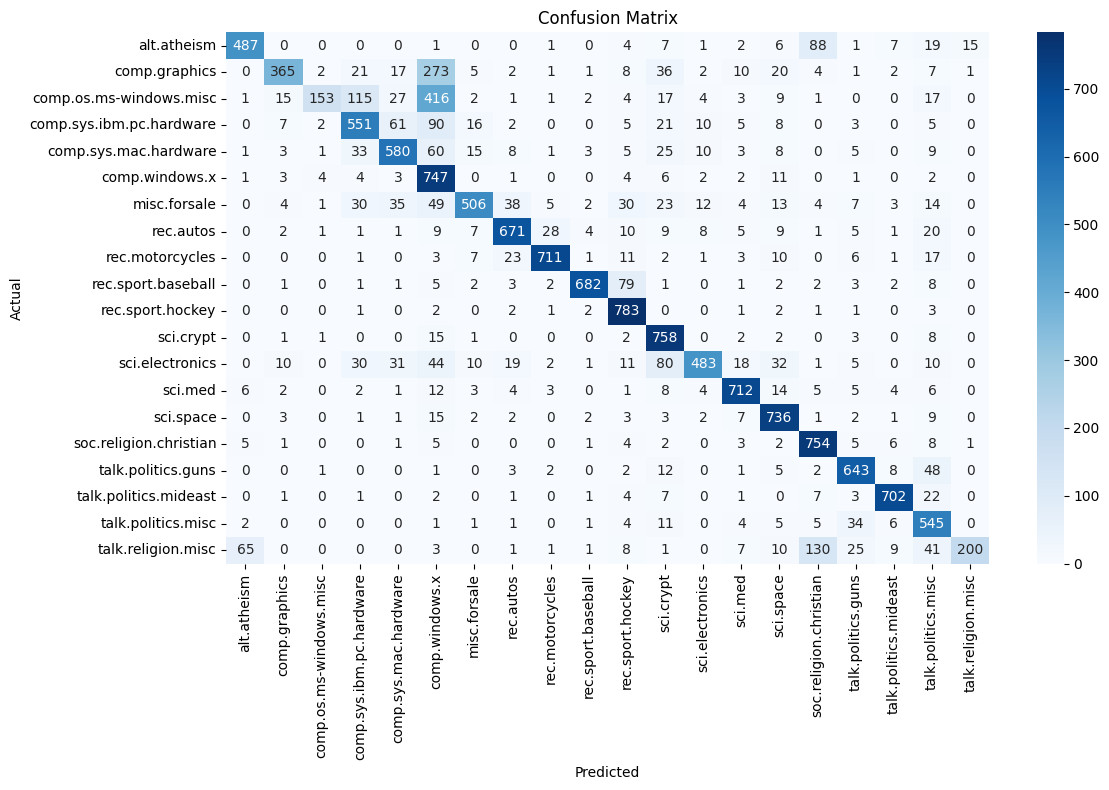

In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer  # 导入词袋模型转换器
from sklearn.model_selection import train_test_split  
from sklearn.naive_bayes import MultinomialNB  # 导入朴素贝叶斯分类器
from sklearn.metrics import accuracy_score, recall_score, f1_score, classification_report  
import matplotlib.pyplot as plt  # 导入绘图库
import seaborn as sns  # 导入高级绘图库
# 加载20类新闻数据集
newsgroups = fetch_20newsgroups(subset='all')  # 加载所有数据（训练集和测试集）

# 查看类别标签
categories = newsgroups.target_names
print("类别标签 :")
print(categories)

# 查看数据集的描述
print("\n数据集描述 :")
print(newsgroups.DESCR)

# 查看前5个数据样本
print("\n前5个数据样本 :")
for i in range(5):
    print(f"\n样本 {i+1}:")
    print(newsgroups.data[i])
    print(f"类别: {categories[newsgroups.target[i]]}")
 # 创建词袋模型转换器
vectorizer = CountVectorizer(stop_words='english')  

# 将文本数据转换为词频矩阵
X = vectorizer.fit_transform(newsgroups.data)

# 获取特征名称（词汇表）
feature_names = vectorizer.get_feature_names_out()

print(f"词汇表大小: {len(feature_names)}")
print(f"词汇表中的前10个词: {feature_names[:10]}")

y = newsgroups.target

# 划分数据集，训练集比例为0.2，测试集比例为0.8
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.8, random_state=42, stratify=y
)
# 创建朴素贝叶斯分类器（多项式朴素贝叶斯）
nb_classifier = MultinomialNB()

# 训练模型
nb_classifier.fit(X_train, y_train)
# 在测试集上进行预测
y_pred = nb_classifier.predict(X_test)

# 计算评估指标
accuracy = accuracy_score(y_test, y_pred)  # 准确率
recall = recall_score(y_test, y_pred, average='macro')  # 召回率
f1 = f1_score(y_test, y_pred, average='macro')  # F1 分数

print(f"准确率 (Accuracy): {accuracy:.4f}")
print(f"召回率 (Recall): {recall:.4f}")
print(f"F1 分数 (F1 Score): {f1:.4f}")

# 生成混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)

# 设置绘图风格
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=categories, yticklabels=categories)

# 添加标签和标题
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
# 显示图形
plt.tight_layout()
plt.show()


题目三、以鸢尾花数据集为例 学习k-means聚类
导入数据集和聚类库
使用k-means聚类，将数据分为3个簇，设置随机种子为0
PCA 降维到2维空间后，输出可视化结果
尝试先降维，再聚类，再输出可视化结果，比较两次的不同
使用轮廓系数比较聚类效果
绘制轮廓系数与聚类数的关系图


聚类标签 (Clusters):
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]

聚类中心 (Cluster Centers):
[[5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.428      1.462      0.246     ]
 [6.85384615 3.07692308 5.71538462 2.05384615]]

降维后的数据形状: (150, 2)


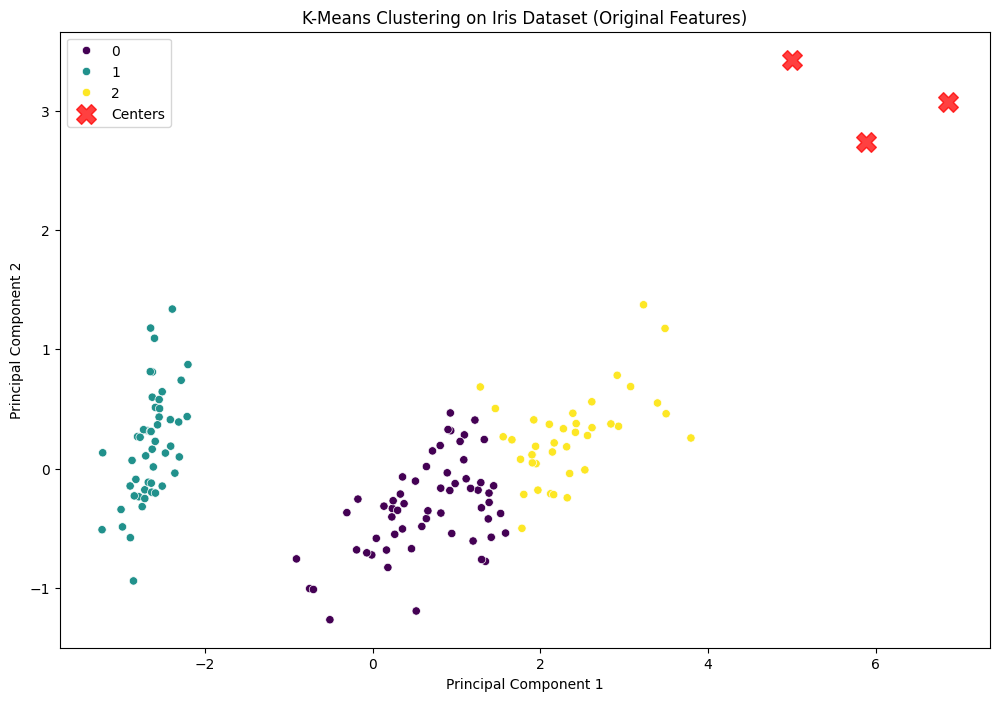

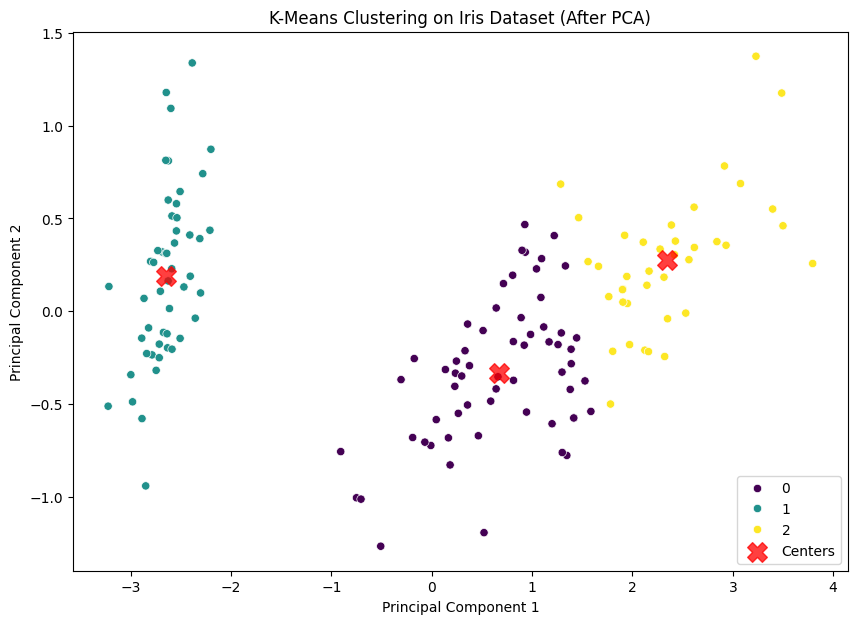


原始特征空间上的轮廓系数: 0.5512
降维后空间上的轮廓系数: 0.5977
簇数: 2, 轮廓系数: 0.6810
簇数: 3, 轮廓系数: 0.5512
簇数: 4, 轮廓系数: 0.4981
簇数: 5, 轮廓系数: 0.4610
簇数: 6, 轮廓系数: 0.3357
簇数: 7, 轮廓系数: 0.3569
簇数: 8, 轮廓系数: 0.3597
簇数: 9, 轮廓系数: 0.3262
簇数: 10, 轮廓系数: 0.3258


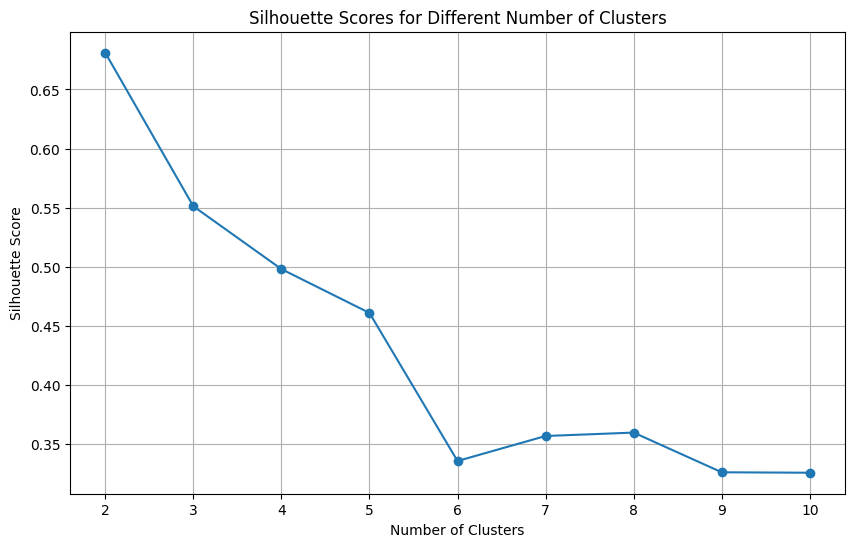

In [7]:
import numpy as np  
import pandas as pd  
from sklearn.datasets import load_iris  
from sklearn.cluster import KMeans  # 导入 K-Means 聚类算法
from sklearn.decomposition import PCA  # PCA 降维算法
from sklearn.metrics import silhouette_score, silhouette_samples  # 导入轮廓系数计算
import matplotlib.pyplot as plt  
import seaborn as sns  
# 加载鸢尾花数据集
iris = load_iris()
X = iris.data  
y = iris.target  
# 创建 K-Means 聚类模型，设置簇的数量为3，随机种子为0
kmeans = KMeans(n_clusters=3, random_state=0)
# 训练模型
kmeans.fit(X)
# 获取聚类标签
clusters = kmeans.labels_
# 获取聚类中心
centers = kmeans.cluster_centers_

# 打印聚类标签和聚类中心
print("\n聚类标签 (Clusters):")
print(clusters)

print("\n聚类中心 (Cluster Centers):")
print(centers)

# 创建 PCA 对象，将数据降维到2维
pca = PCA(n_components=2)

# 训练 PCA 模型并转换数据
X_pca = pca.fit_transform(X)

# 打印降维后的数据形状
print("\n降维后的数据形状:", X_pca.shape)

# 可视化原始特征空间上的聚类结果
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', legend='full')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centers')
plt.title('K-Means Clustering on Iris Dataset (Original Features)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# 在降维后的数据上执行 K-Means 聚类
kmeans_pca = KMeans(n_clusters=3, random_state=0)
kmeans_pca.fit(X_pca)
clusters_pca = kmeans_pca.labels_
centers_pca = kmeans_pca.cluster_centers_

# 可视化降维后空间上的聚类结果
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters_pca, palette='viridis', legend='full')
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centers')
plt.title('K-Means Clustering on Iris Dataset (After PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# 计算原始特征空间上的轮廓系数
silhouette_orig = silhouette_score(X, clusters)
print(f"\n原始特征空间上的轮廓系数: {silhouette_orig:.4f}")

# 计算降维后空间上的轮廓系数
silhouette_pca = silhouette_score(X_pca, clusters_pca)
print(f"降维后空间上的轮廓系数: {silhouette_pca:.4f}")

# 定义簇数范围
range_n_clusters = list(range(2, 11))

# 存储每个簇数对应的轮廓系数
silhouette_scores = []

for n_clusters in range_n_clusters:
    # 创建 K-Means 模型
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    
    # 训练模型并预测簇标签
    cluster_labels = kmeans.fit_predict(X)
    
    # 计算轮廓系数
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    print(f"簇数: {n_clusters}, 轮廓系数: {silhouette_avg:.4f}")

# 绘制轮廓系数与簇数的关系图
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()
